# FEATURE EXTRACTION

In [29]:
# you start empty df
# loop over mt files
# create subdf that has only movement for the particular tier
# and then you calculate for this file whatever you want
# and append it to the empty df with the trialID 
import os
import glob
import pandas as pd
import numpy as np
import math
import pyentrp


#import antropy as ant
import pyentrp

from pyentrp import entropy as ent

import scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import math

import xml.etree.ElementTree as ET
import re

curfolder = os.getcwd()
print(curfolder)

mtfolder = curfolder + '/TS_movement/'
print(mtfolder)

mtfiles = glob.glob(mtfolder + '*.csv')

demographics = curfolder + "/LNDW.csv"
demographics2 = curfolder + "/demographics2.csv"

which_arm = curfolder + '/which_arm.csv'
which_arm = pd.read_csv(which_arm)

# create an empty dataframe where I will store all of the features.



/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/


In [31]:
# gesture space calculator: 

def gesturespace(sample, joint, side, movement_type): 
    #fileID = sample["fileID"]
    #fileID = fileID.replace('_comr.mp4', '')
    #get the subdf for where there is only arm movement.
    fileID = sample["fileID"][0]
    total_movement = int(0)
    movement_sample = sample[sample[movement_type] == 'movement']
    if movement_type == 'arms':
        if side == "LEFT_": 
            arm = 'l'
        if side == "RIGHT_":
            arm = 'r'
        # if that specific arm has no movement, return zero
        if not which_arm.loc[which_arm['fileID'] == fileID, 'arms'].isin([arm, 'b']).any():
            return 0
        # if that specific arm does have movement, return the movement
        else:
            if movement_sample.empty:
                return 0
            else:
                X_std = np.std(movement_sample["X_" + side + joint])
                Y_std = np.std(movement_sample["Y_" + side + joint])
                total_movement = X_std + Y_std
                return total_movement
    # if it is no arms, return the movement
    if movement_sample.empty:
        return 0
    else:
        X_std = np.std(movement_sample["X_" + side + joint])
        Y_std = np.std(movement_sample["Y_" + side + joint])
        Z_std = np.std(movement_sample["Z_" + side + joint])
        total_movement = X_std + Y_std + Z_std
        return total_movement
    
def gesturespace2D(sample, joint, side, movement_type): 
    #fileID = sample["fileID"]
    #fileID = fileID.replace('_comr.mp4', '')
    #get the subdf for where there is only arm movement. 
    fileID = sample["fileID"][0]
    total_movement = int(0)
    movement_sample = sample[sample[movement_type] == 'movement']
    # if the movement type is arms, then check whether the left or right arm has movement and output accordingly. 
    if movement_type == 'arms':
        if side == "LEFT_": 
            arm = 'l'
        if side == "RIGHT_":
            arm = 'r'
        # if that specific arm has no movement, return zero
        if not which_arm.loc[which_arm['fileID'] == fileID, 'arms'].isin([arm, 'b']).any():
            return 0
        # if that specific arm does have movement, return the movement
    # if it is no arms, return the movement
    if movement_sample.empty:
        return 0
    else:
        X_std = np.std(movement_sample["X_" + side + joint])
        Y_std = np.std(movement_sample["Y_" + side + joint])
        total_movement = X_std + Y_std
        return total_movement


# entropy calculator
def entropyts(sample, joint, side, movement_type):
    fileID = sample["fileID"][0]
    movement_sample = sample[sample[movement_type] == "movement"]
    if movement_type == 'arms':
        if side == "LEFT_": 
            arm = 'l'
        if side == "RIGHT_":
            arm = 'r'
        # if that specific arm has no movement, return zero
        if not which_arm.loc[which_arm['fileID'] == fileID, 'arms'].isin([arm, 'b']).any():
            return 0
    if movement_sample.empty:
        return 0
    else:
        speed_ts = (movement_sample[side + joint + "_speed"]).values
        sample_entropy = ent.sample_entropy(speed_ts, 1)
        return sample_entropy
    
def entropyts2D(sample, joint, side, movement_type):
    fileID = sample["fileID"][0]
    movement_sample = sample[sample[movement_type] == "movement"]
    if movement_type == 'arms':
        if side == "LEFT_": 
            arm = 'l'
        if side == "RIGHT_":
            arm = 'r'
        # if that specific arm has no movement, return zero
        if not which_arm.loc[which_arm['fileID'] == fileID, 'arms'].isin([arm, 'b']).any():
            #print(which_arm.loc[which_arm['fileID'] == fileID, 'arms'].values)
            #print ("side: " + side)
            #print ("arm: " + arm)
            return 0
        # if that specific arm does have movement, return the movement
    if movement_sample.empty:
        return 0
    else:
        speed_ts = (movement_sample[side + joint + "_speed2D"]).values
        sample_entropy = ent.sample_entropy(speed_ts, 1)
        return sample_entropy

def temporal_variability_function(sample, joint, side, movement_type):
    fileID = sample["fileID"][0]
    movement_sample = sample[sample[movement_type] == "movement"]
    if movement_type == 'arms':
        if side == "LEFT_": 
            arm = 'l'
        if side == "RIGHT_":
            arm = 'r'
        # if that specific arm has no movement, return zero
        if not which_arm.loc[which_arm['fileID'] == fileID, 'arms'].isin([arm, 'b']).any():
            #print(which_arm.loc[which_arm['fileID'] == fileID, 'arms'].values)
            #print ("side: " + side)
            #print ("arm: " + arm)
            return 0
        # if that specific arm does have movement, return the movement
    if movement_sample.empty:
        return 0
    else:
        speed_ts = (movement_sample[side + joint + "_speed"]).to_numpy()
        avg_height = np.mean(speed_ts)
        peaks, _ = scipy.signal.find_peaks(speed_ts, avg_height)
        if len(peaks) > 2:
            diff_in_peaks = np.empty(len(peaks)-1)
            for i in range(len(peaks)-1): 
                current_peak = sample.loc[peaks[i], "time" ]
                next_peak = sample.loc[peaks[i+1], "time" ]
                time_between_peaks = next_peak - current_peak
                diff_in_peaks[i] = time_between_peaks
            temporal_variability= np.std(diff_in_peaks)
            return temporal_variability
        else:
            return 0

def temporal_variability_function2D(sample, joint, side, movement_type):
    fileID = sample["fileID"][0]
    movement_sample = sample[sample[movement_type] == "movement"]
    if movement_type == 'arms':
        if side == "LEFT_": 
            arm = 'l'
        if side == "RIGHT_":
            arm = 'r'
        # if that specific arm has no movement, return zero
        if not which_arm.loc[which_arm['fileID'] == fileID, 'arms'].isin([arm, 'b']).any():
            #print(which_arm.loc[which_arm['fileID'] == fileID, 'arms'].values)
            #print ("side: " + side)
            #print ("arm: " + arm)
            return 0
    if movement_sample.empty:
        return 0
    else:
        speed_ts = (movement_sample[side + joint + "_speed2D"]).to_numpy()
        avg_height = np.mean(speed_ts)
        peaks, _ = scipy.signal.find_peaks(speed_ts, avg_height)
        if len(peaks) > 2:
            diff_in_peaks = np.empty(len(peaks)-1)
            for i in range(len(peaks)-1): 
                current_peak = sample.loc[peaks[i], "time" ]
                next_peak = sample.loc[peaks[i+1], "time" ]
                time_between_peaks = next_peak - current_peak
                diff_in_peaks[i] = time_between_peaks
            temporal_variability= np.std(diff_in_peaks)
            return temporal_variability
        else:
            return 0
    


In [32]:
# creates the dataframe of features
featuredf = pd.DataFrame()

# gets the survey information
demographics_read = pd.read_csv(demographics2)

# adds survey columns to the features csv file
columns_to_add = demographics_read.columns
for col in columns_to_add:
    featuredf[col] = pd.NA


# Big For Loop For Feature Extraction

In [33]:
demographics_read[demographics_read["Q1"] == str(int(52))]

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,DistributionChannel,UserLanguage,Q1,Q2,Q3,Q4,Q5,Q6,Q7_16,Q8
51,2024-06-22 23:25:43,2024-06-22 23:27:12,IP Address,37.188.157.236,100,89,TRUE,2024-06-22 23:27:12,R_2HMoqmnLDjTlvNN,NaN,...,anonymous,EN,52,21,Berlin,Man / Männlich,Deutsch,"Englisch- sehr gut, Italienisch - grundlegend",53,Right-handed / Rechtshänder*in


In [34]:
# big loop to loop through all of the files and extract features

count = 0
for file in mtfiles:
    print(file)
    sample = pd.read_csv(file)

    # get the fileID 
    featuredf.loc[count, "fileID"] = (sample["fileID"])[0]

    # get the chainID and the participantID
    featuredf.loc[count, "chainID"] = sample["participantID"][0]
    chainID = featuredf["chainID"][count]
    split_string = chainID.split('ch')[1]
    split_string = split_string.split('g')
    chain_num = split_string[0]
    gen_num = split_string[1]
    featuredf.loc[count, "generation_number"] = int(gen_num)
    featuredf.loc[count, "chain_number"] = int(chain_num)
    participantID = (int(chain_num) - 1) * 20 + int(gen_num)
    #participantID = int(chain_num) * int(gen_num) --> this is wrong
    gesture = featuredf.loc[count, 'fileID'].split("_")[0]
    gesture_chain = (re.split(r"_g\d+", featuredf.loc[count, 'fileID'])[0])
    featuredf.loc[count, "participantID"] = participantID
    featuredf.loc[count, "gesture"] = gesture
    featuredf.loc[count, "gesture_chain"] = gesture_chain

    # get the demographic information from the survey and puts it in correct row in featuredf 
    matching_rows = demographics_read[demographics_read["Q1"] == str(int(participantID))]
    if len(matching_rows) > 0:
        demographic_row = matching_rows.iloc[0]
        matching_row = demographics_read[demographics_read["Q1"] == str(int(participantID))]
        featuredf.loc[count, columns_to_add] = matching_row.iloc[0].values
    else:
        print("no matching demographics row" + "for" + str(participantID))

    #Get the gesture space measures (should I move this into a function itself?)
    '''
    #left arm
    featuredf.loc[count, "left_index_space"] = gesturespace(sample, "INDEX", "LEFT_", "arms")
    featuredf.loc[count, "left_wrist_space"] = gesturespace(sample, "WRIST", "LEFT_", "arms")
    featuredf.loc[count, "left_elbow_space"] = gesturespace(sample, "ELBOW", "LEFT_", "arms")
    featuredf.loc[count, "total_left_arm_space"] = featuredf.loc[count, "left_index_space"] + featuredf.loc[count, "left_wrist_space"] + featuredf.loc[count, "left_elbow_space"]

    # right arm
    featuredf.loc[count, "right_index_space"] = gesturespace(sample, "INDEX", "RIGHT_", "arms")
    featuredf.loc[count, "right_wrist_space"] = gesturespace(sample, "WRIST", "RIGHT_", "arms")
    featuredf.loc[count, "right_elbow_space"] = gesturespace(sample, "ELBOW", "RIGHT_", "arms")
    featuredf.loc[count, "total_right_arm_space"] = featuredf.loc[count, "right_index_space"] + featuredf.loc[count, "right_wrist_space"] + featuredf.loc[count, "right_elbow_space"]

    # left leg
    featuredf.loc[count, "left_ankle_space"] = gesturespace(sample, "ANKLE", "LEFT_", "lower_body")
    featuredf.loc[count, "left_knee_space"] = gesturespace(sample, "KNEE", "LEFT_", "lower_body")
    featuredf.loc[count, "left_hip_space"] = gesturespace(sample, "HIP", "LEFT_", "lower_body")
    featuredf.loc[count, "total_left_leg_space"] = featuredf.loc[count, "left_ankle_space"] + featuredf.loc[count, "left_knee_space"] + featuredf.loc[count, "left_hip_space"]

    # right leg
    featuredf.loc[count, "right_ankle_space"] = gesturespace(sample, "ANKLE", "RIGHT_", "lower_body")
    featuredf.loc[count, "right_knee_space"] = gesturespace(sample, "KNEE", "RIGHT_", "lower_body")
    featuredf.loc[count, "right_hip_space"] = gesturespace(sample, "HIP", "RIGHT_", "lower_body")
    featuredf.loc[count, "total_right_leg_space"] = featuredf.loc[count, "right_ankle_space"] + featuredf.loc[count, "right_knee_space"] + featuredf.loc[count, "right_hip_space"]

    # head (nose)
    featuredf.loc[count, "nose_space"] = gesturespace(sample, "NOSE", "", "head_mov")
    featuredf.loc[count, "total_head_space"] = featuredf.loc[count, "nose_space"]

    # total gesture space
    featuredf.loc[count, "total_gesture_space"] = featuredf.loc[count, "total_left_arm_space"] + featuredf.loc[count, "total_right_arm_space"] + featuredf.loc[count, "total_left_leg_space"] + featuredf.loc[count, "total_right_leg_space"] + featuredf.loc[count, 'total_head_space']

    # get the entropy for wrist, knee, and ankle. 
    #wrist entropy
    featuredf.loc[count, "right_wrist_entropy"] = entropyts(sample, "WRIST", "RIGHT_", "arms")
    featuredf.loc[count, "left_wrist_entropy"] = entropyts(sample, "WRIST", "LEFT_", "arms")

    #knees enropy
    featuredf.loc[count, "right_knee_entropy"] = entropyts(sample, "KNEE", "RIGHT_", "lower_body")
    featuredf.loc[count, "left_knee_entropy"] = entropyts(sample, "KNEE", "LEFT_", "lower_body")

    #ankle enropy
    featuredf.loc[count, "right_ankle_entropy"] = entropyts(sample, "ANKLE", "RIGHT_", "lower_body")
    featuredf.loc[count, "left_ankle_entropy"] = entropyts(sample, "ANKLE", "LEFT_", "lower_body")

    #total_entropy
    featuredf.loc[count, "total_body_entropy"] = featuredf.loc[count, "left_ankle_entropy"]+ featuredf.loc[count, "right_ankle_entropy"] + featuredf.loc[count, "left_knee_entropy"] +featuredf.loc[count, "right_knee_entropy"] + featuredf.loc[count, "left_wrist_entropy"] + featuredf.loc[count, "right_wrist_entropy"]

    # temporal variability
    #wrist
    featuredf.loc[count, "right_wrist_variability"] = temporal_variability_function(sample, "WRIST", "RIGHT_", "arms")
    featuredf.loc[count, "left_wrist_variability"] = temporal_variability_function(sample, "WRIST", "LEFT_", "arms")

    #total variability
    featuredf.loc[count, 'total_body_variability'] = featuredf.loc[count, "right_wrist_variability"] + featuredf.loc[count, "left_wrist_variability"]

    # NOW HERE I COLLECT ALL OF THE 2D FEATURES: 
    '''
        #left arm
    featuredf.loc[count, "left_index_space2D"] = gesturespace2D(sample, "INDEX", "LEFT_", "arms")
    featuredf.loc[count, "left_wrist_space2D"] = gesturespace2D(sample, "WRIST", "LEFT_", "arms")
    featuredf.loc[count, "left_elbow_space2D"] = gesturespace2D(sample, "ELBOW", "LEFT_", "arms")
    featuredf.loc[count, "total_left_arm_space2D"] = featuredf.loc[count, "left_index_space2D"] + featuredf.loc[count, "left_wrist_space2D"] + featuredf.loc[count, "left_elbow_space2D"]

    # right arm
    featuredf.loc[count, "right_index_space2D"] = gesturespace2D(sample, "INDEX", "RIGHT_", "arms")
    featuredf.loc[count, "right_wrist_space2D"] = gesturespace2D(sample, "WRIST", "RIGHT_", "arms")
    featuredf.loc[count, "right_elbow_space2D"] = gesturespace2D(sample, "ELBOW", "RIGHT_", "arms")
    featuredf.loc[count, "total_right_arm_space2D"] = featuredf.loc[count, "right_index_space2D"] + featuredf.loc[count, "right_wrist_space2D"] + featuredf.loc[count, "right_elbow_space2D"]

    # left leg
    featuredf.loc[count, "left_ankle_space2D"] = gesturespace2D(sample, "ANKLE", "LEFT_", "lower_body")
    featuredf.loc[count, "left_knee_space2D"] = gesturespace2D(sample, "KNEE", "LEFT_", "lower_body")
    featuredf.loc[count, "left_hip_space2D"] = gesturespace2D(sample, "HIP", "LEFT_", "lower_body")
    featuredf.loc[count, "total_left_leg_space2D"] = featuredf.loc[count, "left_ankle_space2D"] + featuredf.loc[count, "left_knee_space2D"] + featuredf.loc[count, "left_hip_space2D"]

    # right leg
    featuredf.loc[count, "right_ankle_space2D"] = gesturespace2D(sample, "ANKLE", "RIGHT_", "lower_body")
    featuredf.loc[count, "right_knee_space2D"] = gesturespace2D(sample, "KNEE", "RIGHT_", "lower_body")
    featuredf.loc[count, "right_hip_space2D"] = gesturespace2D(sample, "HIP", "RIGHT_", "lower_body")
    featuredf.loc[count, "total_right_leg_space2D"] = featuredf.loc[count, "right_ankle_space2D"] + featuredf.loc[count, "right_knee_space2D"] + featuredf.loc[count, "right_hip_space2D"]

    # head (nose)
    featuredf.loc[count, "nose_space2D"] = gesturespace2D(sample, "NOSE", "", "head_mov")
    featuredf.loc[count, "total_head_space2D"] = featuredf.loc[count, "nose_space2D"]

    # total gesture space
    featuredf.loc[count, "total_gesture_space2D"] = featuredf.loc[count, "total_left_arm_space2D"] + featuredf.loc[count, "total_right_arm_space2D"] + featuredf.loc[count, "total_left_leg_space2D"] + featuredf.loc[count, "total_right_leg_space2D"] + featuredf.loc[count, 'total_head_space2D']

    # get the entropy for wrist, knee, and ankle. 
    #wrist entropy
    featuredf.loc[count, "right_wrist_entropy2D"] = entropyts2D(sample, "WRIST", "RIGHT_", "arms")
    featuredf.loc[count, "left_wrist_entropy2D"] = entropyts2D(sample, "WRIST", "LEFT_", "arms")

    #knees enropy
    featuredf.loc[count, "right_knee_entropy2D"] = entropyts2D(sample, "KNEE", "RIGHT_", "lower_body")
    featuredf.loc[count, "left_knee_entropy2D"] = entropyts2D(sample, "KNEE", "LEFT_", "lower_body")

    #ankle enropy
    featuredf.loc[count, "right_ankle_entropy2D"] = entropyts2D(sample, "ANKLE", "RIGHT_", "lower_body")
    featuredf.loc[count, "left_ankle_entropy2D"] = entropyts2D(sample, "ANKLE", "LEFT_", "lower_body")

    #total_entropy
    featuredf.loc[count, "total_body_entropy2D"] = featuredf.loc[count, "left_ankle_entropy2D"]+ featuredf.loc[count, "right_ankle_entropy2D"] + featuredf.loc[count, "left_knee_entropy2D"] +featuredf.loc[count, "right_knee_entropy2D"] + featuredf.loc[count, "left_wrist_entropy2D"] + featuredf.loc[count, "right_wrist_entropy2D"]

    # temporal variability
    #wrist
    featuredf.loc[count, "right_wrist_variability2D"] = temporal_variability_function2D(sample, "WRIST", "RIGHT_", "arms")
    featuredf.loc[count, "left_wrist_variability2D"] = temporal_variability_function2D(sample, "WRIST", "LEFT_", "arms")

    #total variability
    featuredf.loc[count, 'total_body_variability2D'] = featuredf.loc[count, "right_wrist_variability2D"] + featuredf.loc[count, "left_wrist_variability2D"]
    count = count +1



/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/rennen_g_ch3_g12_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch2_g3_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/kalt_g_ch1_g0_compr.eaf.csv
no matching demographics rowfor0
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch1_g16_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/kalt_g_ch2_g10_compr.eaf.csv


/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/pyentrp/entropy.py:194: RuntimeWarning: divide by zero encountered in log
  sampen = -np.log(N_temp[1:] / N_temp[:-1])
/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/pyentrp/entropy.py:194: RuntimeWarning: divide by zero encountered in log
  sampen = -np.log(N_temp[1:] / N_temp[:-1])


/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/rennen_g_ch1_g0_compr.eaf.csv
no matching demographics rowfor0
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/leise_g_ch2_g17_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/kalt_g_ch2_g6_compr.eaf.csv
no matching demographics rowfor26
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch1_g5_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/rennen_g_ch2_g6_compr.eaf.csv
no matching demographics rowfor26
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/kalt_g_ch2_g14_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/rennen_g_ch1_g4_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch1_g12_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_Iterat

/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/pyentrp/entropy.py:194: RuntimeWarning: divide by zero encountered in log
  sampen = -np.log(N_temp[1:] / N_temp[:-1])
/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/pyentrp/entropy.py:194: RuntimeWarning: divide by zero encountered in log
  sampen = -np.log(N_temp[1:] / N_temp[:-1])
/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/pyentrp/entropy.py:194: RuntimeWarning: divide by zero encountered in log
  sampen = -np.log(N_temp[1:] / N_temp[:-1])
/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/pyentrp/entropy.py:194: RuntimeWarning: divide by zero encountered in log
  sampen = -np.log(N_temp[1:] / N_temp[:-1])
/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/pyentrp/entropy.py:194: RuntimeWarning: divide by zero encountered in log
  sampen = -np.log(N_temp[1:] / N_temp[:-1])
/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/pyentrp/entropy.py:194: RuntimeWa

/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/rennen_g_ch1_g2_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch1_g0_compr.eaf.csv
no matching demographics rowfor0
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/leise_g_ch2_g12_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/kalt_g_ch2_g3_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/rennen_g_ch2_g3_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch1_g13_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/kalt_g_ch1_g5_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/rennen_g_ch3_g17_compr.eaf.csv
/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch2_g6_compr.eaf.csv
no matching dem

In [23]:
import re
pattern = "_g"r"^[0-9]$"
print(featuredf.loc[4, 'fileID'])
regex = '^[0-9]'
print(re.split(r"_g\d+", featuredf.loc[4, 'fileID'])[0])

leise_g_ch2_g17_compr.mp4
leise_g_ch2


In [19]:
featuredf

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,right_wrist_entropy2D,left_wrist_entropy2D,right_knee_entropy2D,left_knee_entropy2D,right_ankle_entropy2D,left_ankle_entropy2D,total_body_entropy2D,right_wrist_variability2D,left_wrist_variability2D,total_body_variability2D
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.471575,2.425290,2.706465,2.648032,2.421757,2.242816,14.915936,375.976096,431.483230,807.459326
1,2024-06-22 19:10:30,2024-06-22 19:11:50,IP Address,80.187.86.205,100,79,True,2024-06-22 19:11:51,R_85octQBWW7eTgY1,NaN,...,2.133836,1.931825,2.627848,2.469158,2.481004,2.197915,13.841585,1366.666667,1018.562289,2385.228955
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,inf,inf,0.000000,0.000000,0.000000,0.000000,inf,0.000000,0.000000,0.000000
3,2024-06-22 18:30:47,2024-06-22 18:32:31,IP Address,80.187.84.147,100,104,True,2024-06-22 18:32:32,R_2CBcu7cAm27UMef,NaN,...,2.566540,2.369907,2.771422,2.383941,2.866857,2.857326,15.815994,555.708312,436.288004,991.996316
4,2024-06-22 20:40:38,2024-06-22 20:41:50,IP Address,195.37.172.125,100,71,True,2024-06-22 20:41:50,R_2ITaokxupfNc5aE,NaN,...,1.997318,1.756856,2.365650,2.258929,2.515995,2.369060,13.263808,1027.396816,621.324750,1648.721566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2024-06-22 18:29:04,2024-06-22 18:30:21,IP Address,176.0.161.7,100,77,True,2024-06-22 18:30:22,R_20d86fCIwghMdnM,NaN,...,2.763485,2.562486,2.857205,2.620304,2.870387,2.735696,16.409563,652.939231,900.943264,1553.882496
299,2024-06-22 20:40:38,2024-06-22 20:41:50,IP Address,195.37.172.125,100,71,True,2024-06-22 20:41:50,R_2ITaokxupfNc5aE,NaN,...,2.540358,2.812645,2.686413,2.732264,2.716976,2.590799,16.079455,231.699821,305.857406,537.557227
300,2024-06-22 21:29:37,2024-06-22 21:30:22,IP Address,176.0.151.223,100,45,True,2024-06-22 21:30:23,R_2hryrFFtZG5VnWe,NaN,...,2.528761,2.504956,2.698962,2.724901,2.591850,2.543152,15.592582,208.965707,439.874346,648.840052
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.935380,0.982544,0.000000,0.000000,0.000000,0.000000,1.917924,1897.415396,2025.000000,3922.415396


# code to plot the features for each chain

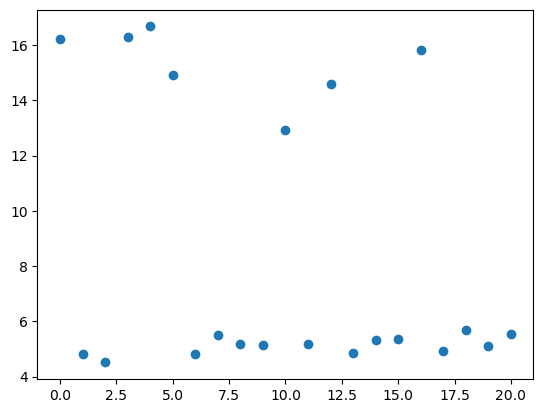

In [5]:
samplechainD = featuredf[featuredf['fileID'].str.contains("Donner_g_ch1")]

#plt.plot(samplechainD['generation_number'], samplechainD['total_gesture_space'], marker='o', linestyle='')
#plt.plot(samplechainD['generation_number'], samplechainD['total_gesture_space2D'], marker='o', linestyle='')
#plt.plot(samplechainD['generation_number'], samplechainD['right_wrist_space'], marker='o', linestyle='')
#plt.plot(samplechainD['generation_number'], samplechainD['right_wrist_space2D'], marker='o', linestyle='')

#plt.plot(samplechainD['generation_number'], samplechainD['total_body_entropy'], marker='o', linestyle='')
plt.plot(samplechainD['generation_number'], samplechainD['total_body_entropy2D'], marker='o', linestyle='')

#plt.plot(samplechainD['generation_number'], samplechainD['total_body_variability'], marker='o', linestyle='')
#plt.plot(samplechainD['generation_number'], samplechainD['total_body_variability2D'], marker='o', linestyle='')
#plt.plot(samplechainD['generation_number'], samplechainD['total_body_entropy2D'], marker='o', linestyle='')


In [44]:
samplechainD

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,right_wrist_entropy2D,left_wrist_entropy2D,right_knee_entropy2D,left_knee_entropy2D,right_ankle_entropy2D,left_ankle_entropy2D,total_body_entropy2D,right_wrist_variability2D,left_wrist_variability2D,total_body_variability2D
7,2024-06-22 18:03:09,2024-06-22 18:05:02,IP Address,80.187.86.216,100,113,True,2024-06-22 18:05:03,R_2geuqXPNJd7koGl,NaN,...,2.811047,2.739922,2.656909,2.720871,2.763551,2.742611,16.516995,119.931244,70.873205,190.804449
14,2024-06-22 17:32:43,2024-06-22 17:33:55,IP Address,176.0.200.68,100,72,True,2024-06-22 17:33:55,R_2ziH7Mzu9vZTMte,NaN,...,2.858737,2.802949,2.883880,2.622031,2.754709,2.659613,16.755805,133.361976,152.559187,285.921163
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.474358,2.548762,2.639177,2.237299,2.905679,2.518983,15.392359,103.577966,134.090443,237.668409
31,2024-06-22 20:40:38,2024-06-22 20:41:50,IP Address,195.37.172.125,100,71,True,2024-06-22 20:41:50,R_2ITaokxupfNc5aE,NaN,...,2.563801,2.676716,2.673455,2.349928,2.729637,2.220477,15.293803,353.645450,195.248893,548.894343
38,2024-06-22 19:40:05,2024-06-22 19:44:13,IP Address,195.37.172.125,100,248,True,2024-06-22 19:44:14,R_2QJURmQ1dda9o9S,NaN,...,2.913865,2.686610,2.756595,2.413042,2.822164,2.739588,16.405324,108.473467,121.874505,230.347972
47,2024-06-22 20:44:36,2024-06-22 20:46:02,IP Address,80.187.85.2,100,85,True,2024-06-22 20:46:02,R_8gZtXK5xIfoQH67,NaN,...,2.737254,2.650783,2.473802,2.721464,2.102488,2.683643,15.442592,118.928512,115.220064,234.148576
61,2024-06-22 18:02:30,2024-06-22 18:03:36,IP Address,176.1.231.251,100,66,True,2024-06-22 18:03:36,R_8MKVK9awzFX6heW,NaN,...,2.751496,2.635583,2.639884,2.724600,2.778204,2.668507,16.143253,101.002973,133.329264,234.332237
78,2024-06-22 17:14:18,2024-06-22 17:16:26,IP Address,109.40.242.194,100,127,True,2024-06-22 17:16:26,R_2KIpvLjRioa2KCq,NaN,...,2.738394,2.957055,2.630306,2.864909,2.693951,2.866605,16.680757,128.166344,205.487226,333.653570
111,2024-06-22 20:56:58,2024-06-22 20:59:26,IP Address,80.187.86.160,100,148,True,2024-06-22 20:59:27,R_2PNn6u3joW9B5IJ,NaN,...,2.880133,2.733916,2.873359,2.809956,2.197034,2.300083,16.214573,83.638763,73.804297,157.443060
141,2024-06-22 18:30:47,2024-06-22 18:32:31,IP Address,80.187.84.147,100,104,True,2024-06-22 18:32:32,R_2CBcu7cAm27UMef,NaN,...,2.542564,2.679110,2.589399,2.796893,2.685341,2.767817,16.143620,149.261219,296.168954,445.430173


# Saves the df to the feature extraction file

In [28]:
globals()["feature_extraction"] = featuredf
globals()["feature_extraction"].to_csv(os.path.join(curfolder, f'{"feature_extraction_with2d"}.csv'), index=False)

# feature extraction for a single file

In [7]:
file = "/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/leise_g_ch2_g10_compr.eaf.csv"
sample = pd.read_csv(file)
variability = temporal_variability_function(sample, "WRIST", "RIGHT_", "arms")
print(variability)

0


In [50]:
sample

,time,X_NOSE,Y_NOSE,Z_NOSE,X_LEFT_EYE_INNER,Y_LEFT_EYE_INNER,Z_LEFT_EYE_INNER,X_LEFT_EYE,Y_LEFT_EYE,Z_LEFT_EYE,...,RIGHT_EAR_jerk,LEFT_PINKY_jerk,LEFT_HIP_jerk,NOSE_jerk,LEFT_ELBOW_jerk,LEFT_THUMB_jerk,arms,upper_body,lower_body,head_mov
0,0.000000,-0.005776,0.411220,-0.236848,-0.000578,0.441348,-0.223132,-0.000208,0.441654,-0.222643,...,0.000010,6.755173e-06,2.452220e-09,0.000010,8.928359e-06,7.290744e-06,no movement,no movement,no movement,no movement
1,16.666667,-0.004448,0.415103,-0.229268,0.000730,0.445136,-0.215346,0.001095,0.445441,-0.214859,...,-0.000006,-3.717992e-06,1.066513e-07,-0.000007,-1.962864e-06,-3.812059e-06,no movement,no movement,no movement,no movement
2,33.333333,-0.003497,0.417990,-0.223385,0.001651,0.447966,-0.209316,0.002014,0.448268,-0.208833,...,-0.000014,-9.284529e-06,1.610211e-07,-0.000016,-8.117921e-06,-9.737898e-06,no movement,no movement,no movement,no movement
3,50.000000,-0.002847,0.420056,-0.218951,0.002265,0.450002,-0.204784,0.002625,0.450303,-0.204304,...,-0.000017,-1.116141e-05,1.751799e-07,-0.000019,-1.065989e-05,-1.176572e-05,no movement,no movement,no movement,no movement
4,66.666667,-0.002429,0.421460,-0.215733,0.002641,0.451397,-0.201508,0.002999,0.451696,-0.201030,...,-0.000016,-1.042724e-05,1.580844e-07,-0.000018,-1.058796e-05,-1.102963e-05,no movement,no movement,no movement,no movement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,8483.333333,0.002453,0.405541,-0.259080,0.008226,0.435334,-0.244948,0.008622,0.435661,-0.244446,...,0.000002,1.444671e-06,1.132478e-07,0.000003,1.721582e-06,1.457737e-06,no movement,no movement,no movement,no movement
510,8500.000000,0.002327,0.406005,-0.257515,0.008049,0.435817,-0.243371,0.008444,0.436142,-0.242870,...,-0.000003,-1.406026e-07,1.994182e-07,-0.000002,6.219179e-07,-3.298244e-08,no movement,no movement,no movement,no movement
511,8516.666667,0.002271,0.406431,-0.255879,0.007969,0.436261,-0.241729,0.008363,0.436584,-0.241229,...,-0.000009,-2.008625e-06,2.905933e-07,-0.000007,-7.855564e-07,-1.793109e-06,no movement,no movement,no movement,no movement
512,8533.333333,0.002368,0.406728,-0.254284,0.008090,0.436572,-0.240137,0.008484,0.436895,-0.239639,...,-0.000016,-4.055761e-06,3.834277e-07,-0.000013,-2.451945e-06,-3.723716e-06,no movement,no movement,no movement,no movement


[2.84292478]
[1.95752092]
0.2351190015699423
508.3333333333343
0


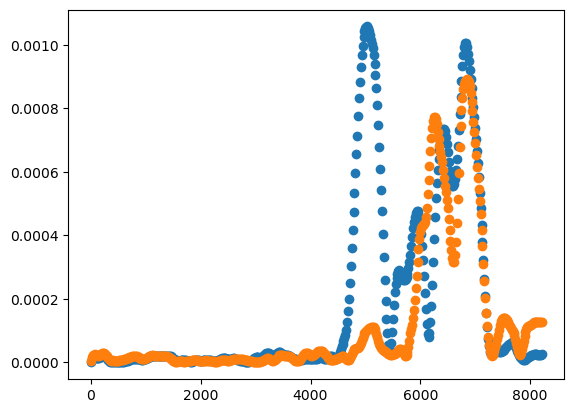

In [69]:
file = '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/Donner_g_ch1_g1_compr.eaf.csv'
sample = pd.read_csv(file)
entropy2 = entropyts2D(sample, "WRIST", "RIGHT_", "arms")
entropy3 = entropyts2D(sample, "WRIST", "LEFT_", "arms")

print(entropy2)
print(entropy3)

gesturespace2D1 = gesturespace2D(sample, "WRIST","RIGHT_", 'arms')
print(gesturespace2D1)

tempv2 = temporal_variability_function2D(sample, "WRIST", "RIGHT_", "head_mov")
tempv3 = temporal_variability_function2D(sample, "WRIST", "LEFT_", "arms")

print(tempv2)
print(tempv3)

#print(gesturespace(sample, "WRIST", "RIGHT_", "arms"))
#print(gesturespace(sample, "WRIST", "LEFT_", "arms"))

#plt.plot(sample['time'], sample['RIGHT_WRIST_speed2D_smoothed204'], marker='x', linestyle='')
#plt.plot(sample['time'], sample['RIGHT_WRIST_speed2D_smoothed301'], marker='x', linestyle='')
plt.plot(sample['time'], sample['RIGHT_WRIST_speed2D'], marker='o', linestyle='')
plt.plot(sample['time'], sample['LEFT_WRIST_speed2D'], marker='o', linestyle='')

#plt.plot(sample['time'], sample['Y_RIGHT_WRIST'], marker='o', linestyle='')
#plt.plot(sample['time'], sample['Y_LEFT_WRIST'], marker='o', linestyle='')

[0.67610353]
0


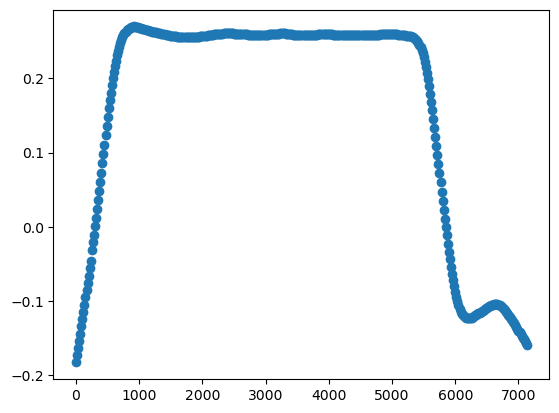

In [61]:
file = '/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/leise_g_ch3_g5_compr.eaf.csv'
sample = pd.read_csv(file)
entropy2 = entropyts2D(sample, "WRIST", "RIGHT_", "arms")
entropy3 = entropyts2D(sample, "WRIST", "LEFT_", "arms")

print(entropy2)
print(entropy3)

#print(gesturespace(sample, "WRIST", "RIGHT_", "arms"))
#print(gesturespace(sample, "WRIST", "LEFT_", "arms"))

#plt.plot(sample['time'], sample['RIGHT_WRIST_speed2D_smoothed204'], marker='x', linestyle='')
#plt.plot(sample['time'], sample['RIGHT_WRIST_speed2D_smoothed301'], marker='x', linestyle='')
plt.plot(sample['time'], sample['Y_RIGHT_WRIST'], marker='o', linestyle='')
#plt.plot(sample['time'], sample['Y_LEFT_WRIST'], marker='o', linestyle='')

# Graphing for a single file for variability

[  3  22  24 342]
variability: 
2418.7156065121044


'\n# graph file two\nfile2 = "/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/leise_g_ch3_g12_compr.eaf.csv"\nsample2 = pd.read_csv(file2)\nmovement_sample2 = sample2[sample2[\'arms\'] == "movement"]\nspeed_ts2 = (movement_sample2["LEFT_" + \'WRIST\' + "_speed2D"]).to_numpy()\navg_height2 = np.mean(speed_ts2)\npeaks2, _ = scipy.signal.find_peaks(speed_ts2, avg_height2)\n\nplt.plot(speed_ts2, label="Speed Time Series")\nplt.plot(peaks2, speed_ts2[peaks2], "x", label="Peaks")\n\n# to calculate the total variability \ndiff_in_peaks = np.empty(len(peaks2)-1)\nprint(diff_in_peaks)\nfor i in range(len(peaks2)-1): \n    current_peak = sample2.loc[peaks2[i], "time" ]\n    next_peak = sample2.loc[peaks2[i+1], "time" ]\n    time_between_peaks = next_peak - current_peak\n    diff_in_peaks[i] = time_between_peaks\n\nvariability= np.std(diff_in_peaks)\nprint("variability 2: ")\nprint(variability)\n'

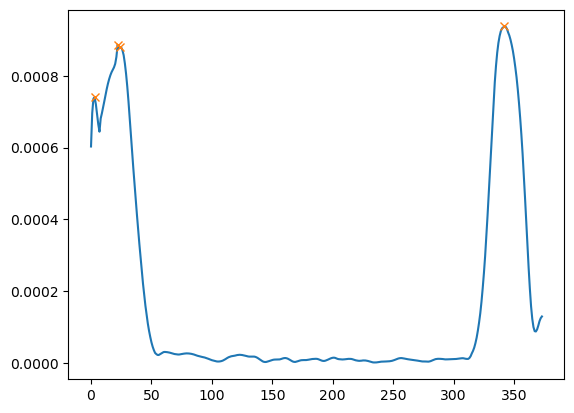

In [65]:
# graph file one
file = "/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/leise_g_ch3_g5_compr.eaf.csv"
sample = pd.read_csv(file)
movement_sample = sample[sample['arms'] == "movement"]
speed_ts = (movement_sample["RIGHT_"+ 'WRIST' + "_speed2D"]).to_numpy()
avg_height = np.mean(speed_ts)
peaks, _ = scipy.signal.find_peaks(speed_ts, avg_height)
print(peaks)


plt.plot(speed_ts, label="Speed Time Series")
plt.plot(peaks, speed_ts[peaks], "x", label="Peaks")

diff_in_peaks = np.empty(len(peaks)-1)
for i in range(len(peaks)-1): 
    current_peak = sample.loc[peaks[i], "time" ]
    next_peak = sample.loc[peaks[i+1], "time" ]
    time_between_peaks = next_peak - current_peak
    diff_in_peaks[i] = time_between_peaks

variability= np.std(diff_in_peaks)
print("variability: ")
print(variability)
'''
# graph file two
file2 = "/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/leise_g_ch3_g12_compr.eaf.csv"
sample2 = pd.read_csv(file2)
movement_sample2 = sample2[sample2['arms'] == "movement"]
speed_ts2 = (movement_sample2["LEFT_" + 'WRIST' + "_speed2D"]).to_numpy()
avg_height2 = np.mean(speed_ts2)
peaks2, _ = scipy.signal.find_peaks(speed_ts2, avg_height2)

plt.plot(speed_ts2, label="Speed Time Series")
plt.plot(peaks2, speed_ts2[peaks2], "x", label="Peaks")

# to calculate the total variability 
diff_in_peaks = np.empty(len(peaks2)-1)
print(diff_in_peaks)
for i in range(len(peaks2)-1): 
    current_peak = sample2.loc[peaks2[i], "time" ]
    next_peak = sample2.loc[peaks2[i+1], "time" ]
    time_between_peaks = next_peak - current_peak
    diff_in_peaks[i] = time_between_peaks

variability= np.std(diff_in_peaks)
print("variability 2: ")
print(variability)
'''

In [ ]:
file = "/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/leise_g_ch1_g9_compr.eaf.csv"

featuredf2 = pd.

count = 1
# get the sample
print(file)
sample = pd.read_csv(file)

# get the fileID 
featuredf.loc[count, "fileID"] = (sample["fileID"])[0]

# get the chainID and the participantID
featuredf.loc[count, "chainID"] = sample["participantID"][0]
chainID = featuredf["chainID"][count]
split_string = chainID.split('ch')[1]
split_string = split_string.split('g')
chain_num = split_string[0]
gen_num = split_string[1]
participantID = int(chain_num) * int(gen_num)
featuredf.loc[count, "participantID"] = participantID

# get the demographic information from the survey and puts it in correct row in featuredf 
matching_rows = demographics_read[demographics_read["Q1"] == str(int(participantID))]
if len(matching_rows) >0:
    demographic_row = matching_rows.iloc[0]
    matching_row = demographics_read[demographics_read["Q1"] == str(int(participantID))]
    featuredf.loc[count, columns_to_add] = matching_row.iloc[0].values
else:
    print("no matching demographics row")


# gesture space processing
#Get the gesture space measures

#left arm
featuredf["left_index_movement"] = gesturespace(sample, "INDEX", "LEFT_", "arms")
featuredf["left_wrist_movement"] = gesturespace(sample, "WRIST", "LEFT_", "arms")
featuredf["left_elbow_movement"] = gesturespace(sample, "ELBOW", "LEFT_", "arms")
featuredf["total_left_arm_movement"] = featuredf["left_index_movement"] + featuredf["left_wrist_movement"] + featuredf["left_elbow_movement"]

# right arm
featuredf["right_index_movement"] = gesturespace(sample, "INDEX", "RIGHT_", "arms")
featuredf["right_wrist_movement"] = gesturespace(sample, "WRIST", "RIGHT_", "arms")
featuredf["right_elbow_movement"] = gesturespace(sample, "ELBOW", "RIGHT_", "arms")
featuredf["total_right_arm_movement"] = featuredf["right_index_movement"] + featuredf["right_wrist_movement"] + featuredf["right_elbow_movement"]

# left leg
featuredf["left_ankle_movement"] = gesturespace(sample, "ANKLE", "LEFT_", "lower_body")
featuredf["left_knee_movement"] = gesturespace(sample, "KNEE", "LEFT_", "lower_body")
featuredf["left_hip_movement"] = gesturespace(sample, "HIP", "LEFT_", "lower_body")
featuredf["total_left_leg_movement"] = featuredf["left_ankle_movement"] + featuredf["left_knee_movement"] + featuredf["left_hip_movement"]

# right leg
featuredf["right_ankle_movement"] = gesturespace(sample, "ANKLE", "RIGHT_", "lower_body")
featuredf["right_knee_movement"] = gesturespace(sample, "KNEE", "RIGHT_", "lower_body")
featuredf["right_hip_movement"] = gesturespace(sample, "HIP", "RIGHT_", "lower_body")
featuredf["total_right_leg_movement"] = featuredf["right_ankle_movement"] + featuredf["right_knee_movement"] + featuredf["right_hip_movement"]

# head (nose)
featuredf["nose_movement"] = gesturespace(sample, "NOSE", "", "head_mov")
featuredf["total_head_movement"] = featuredf["nose_movement"]

# total gesture space
featuredf["total_gesture_space"] = featuredf["total_left_arm_movement"] + featuredf["total_right_arm_movement"] + featuredf["total_left_leg_movement"] + featuredf["total_right_leg_movement"] + featuredf['total_head_movement']

# get the entropy for wrist, knee, and ankle. 
featuredf["left_knee_entropy"] = entropyts(sample, "KNEE", "LEFT_", 'lower_body')



'''

#left arm
featuredf["left_index_movement"] = gesturespace(sample, "INDEX", "LEFT", "arms")
featuredf["left_wrist_movement"] = gesturespace(sample, "WRIST", "LEFT", "arms")
featuredf["left_elbow_movement"] = gesturespace(sample, "ELBOW", "LEFT", "arms")
featuredf["total_left_arm_movement"] = featuredf["left_index_movement"] + featuredf["left_wrist_movement"] + featuredf["left_elbow_movement"]

# right arm
featuredf["right_index_movement"] = gesturespace(sample, "INDEX", "RIGHT", "arms")
featuredf["right_wrist_movement"] = gesturespace(sample, "WRIST", "RIGHT", "arms")
featuredf["right_elbow_movement"] = gesturespace(sample, "ELBOW", "RIGHT", "arms")
featuredf["total_right_arm_movement"] = featuredf["right_index_movement"] + featuredf["right_wrist_movement"] + featuredf["right_elbow_movement"]

# left leg
featuredf["left_ankle_movement"] = gesturespace(sample, "ANKLE", "LEFT", "lower_body")
featuredf["left_knee_movement"] = gesturespace(sample, "KNEE", "LEFT", "lower_body")
featuredf["left_hip_movement"] = gesturespace(sample, "HIP", "LEFT", "lower_body")
featuredf["total_left_leg_movement"] = featuredf["left_ankle_movement"] + featuredf["left_knee_movement"] + featuredf["left_hip_movement"]
'''




/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/TS_movement/leise_g_ch1_g9_compr.eaf.csv


/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/envs/flesh_thesis/lib/python3.12/site-packages/pyentrp/entropy.py:194: RuntimeWarning: invalid value encountered in divide
  sampen = -np.log(N_temp[1:] / N_temp[:-1])


'\n\n#left arm\nfeaturedf["left_index_movement"] = gesturespace(sample, "INDEX", "LEFT", "arms")\nfeaturedf["left_wrist_movement"] = gesturespace(sample, "WRIST", "LEFT", "arms")\nfeaturedf["left_elbow_movement"] = gesturespace(sample, "ELBOW", "LEFT", "arms")\nfeaturedf["total_left_arm_movement"] = featuredf["left_index_movement"] + featuredf["left_wrist_movement"] + featuredf["left_elbow_movement"]\n\n# right arm\nfeaturedf["right_index_movement"] = gesturespace(sample, "INDEX", "RIGHT", "arms")\nfeaturedf["right_wrist_movement"] = gesturespace(sample, "WRIST", "RIGHT", "arms")\nfeaturedf["right_elbow_movement"] = gesturespace(sample, "ELBOW", "RIGHT", "arms")\nfeaturedf["total_right_arm_movement"] = featuredf["right_index_movement"] + featuredf["right_wrist_movement"] + featuredf["right_elbow_movement"]\n\n# left leg\nfeaturedf["left_ankle_movement"] = gesturespace(sample, "ANKLE", "LEFT", "lower_body")\nfeaturedf["left_knee_movement"] = gesturespace(sample, "KNEE", "LEFT", "lower_b